# Laboratorio 1: Regresión en Boston

En este laboratorio deben hacer experimentos de regresión con el conjunto de datos "Boston house prices dataset".

Estudiarán el dataset, harán visualizaciones y seleccionarán atributos relevantes a mano.

Luego, entrenarán y evaluarán diferentes tipos de regresiones, buscando las configuraciones que mejores resultados den.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Carga del Conjunto de Datos

Cargamos el conjunto de datos y vemos su contenido.

In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [ ]:
# print(boston['DESCR'])   # descripción del dataset
# boston['data']           # matriz con los datos de entrada (atributos)
# boston['target']         # vector de valores a predecir
# boston['feature_names']  # nombres de los atributos para cada columna de 'data'

In [ ]:
boston['data'].shape, boston['target'].shape

((506, 13), (506,))

## División en Entrenamiento y Evaluación

Dividimos aleatoriamente los datos en 80% para entrenamiento y 20% para evaluación:

In [ ]:
from sklearn.model_selection import train_test_split
X, y = boston['data'], boston['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
X_train.shape, X_test.shape

((404, 13), (102, 13))

## Ejercicio 1: Descripción de los Datos y la Tarea

Responda las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponibles para hacer la predicción?
4. ¿Qué atributos imagina ud. que serán los más determinantes para la predicción?
5. ¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc? Piense que los datos pueden ser utilizados para hacer predicciones futuras.

**No hace falta escribir código para responder estas preguntas.**

.
1. El conjunto de datos contiene la información sobre el precio de las viviendas en la ciudad de Boston, recopiladas en el año 1978. En total cuenta con 506 registros, dónde para cada vivienda existe un conjunto de variables que la caracterizan, junto con la variable _target_, u variable objetivo que se encuentra representada con MEDV, indicativa de la mediana del valor de las viviendas en miles dólares.<br>

2. La variable objetivo es la variable MEDV, que indica la mediana del valor de viviendas ocupadas por sus dueños en miles de U$D.

3. Se cuenta con los siguientes atributos:

**RIM:**     tasa de crímenes per cápita en el muncipio<br>
**ZN:**      proporción de tierra para uso residencial en lotes mayores a 25.000 pies cuadrados<br>
**INDUS:**   proporción de acres de negocios mayoristas en el municipio<br>
**CHAS:**    variable _dummy_ sobre el río Charles (siendo 1 si limita con el río y 0 si no limita)<br>
**NOX:**     concentración de óxido nítrico en partes por 10 millones<br>

**RM:**      número promedio de habitaciones por vivienda<br>
**AGE:**     proporción de viviendas ocupadas por sus dueños construidas antes de 1940<br>
**DIS:**     distancia ponderada a cinco centros de empleo de Boston<br>
**RAD:**     índice de accesibilidad a autopistas radiales<br>
**TAX:**     tasa de impuesto a la propiedad por U$D10,000<br>
**PTRATIO:** proporción de estudiantes por docente en el municipio<br>
**B:**       1000(Bk - 0.63)^2, dónde Bk es la proporción de personas negras en el municipio<br>
**LSTAT:**   porcentaje de población de posición baja<br>


4. Los atributos mas relevantes podrían ser los vinculados al número de habitaciones (RM), la valuación fiscal (TAX), la variable vinculada al estatus de la población (LSTAT), al índice CRIM, y por último la variable CHAR.

5. Evidentemente existe un problema ético en los datos, evidenciada en la variable B que indica la proporción de población negra en el barrio, de carácter púramente racista. Se puede agregar, del mismo modo, la variable LSTAT.
Así mismo, cabe destacar la antigüedad de los datos, y el desconocimiento de la ciudad de Boston.




## Ejercicio 2: Visualización de los Datos

1. Para cada atributo de entrada, haga una gráfica que muestre su relación con la variable objetivo.
2. Estudie las gráficas, identificando **a ojo** los atributos que a su criterio sean los más informativos para la predicción.
3. Para ud., ¿cuáles son esos atributos? Lístelos en orden de importancia.

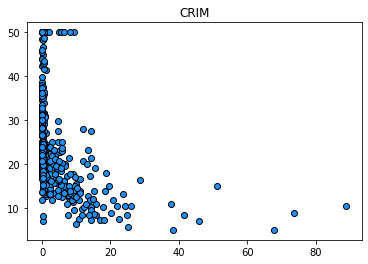

In [ ]:
# 1. Resolver acá. Ayuda/ejemplo:
feature = 'CRIM'
selector = (boston['feature_names'] == feature)
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)
plt.show()

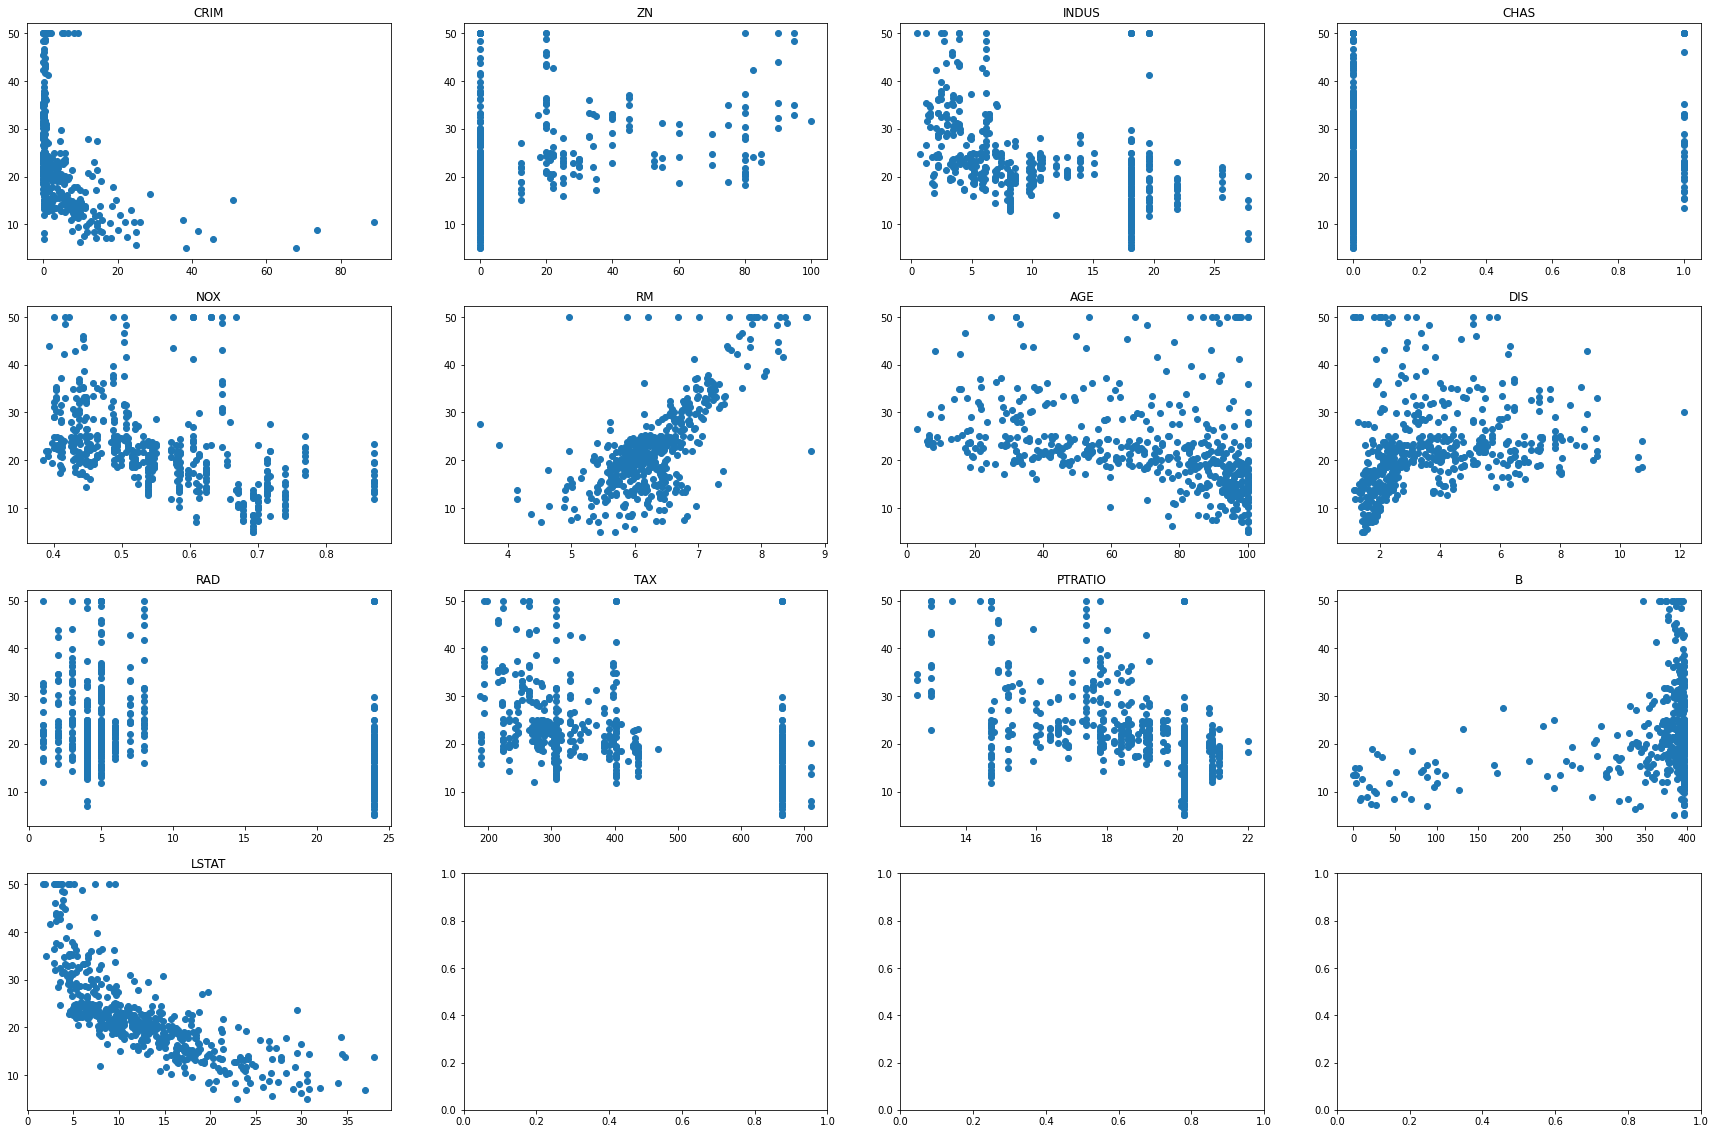

In [ ]:
fig, axs = plt.subplots(4,4, figsize=(30, 20), edgecolor='k')

for i,j in enumerate(boston['feature_names']):

    axs = axs.flatten()

    feature = j
    selector = (boston['feature_names'] == feature)
    
    axs[i].scatter(X[:, selector], y)
    axs[i].set_title(str(j))
    fig.savefig('figure.jpeg')

**Respuestas** 2 y 3

A simple vista, la variable RM parece ser significativa, ya que  se observa una relacion lineal entre la cantidad de habitaciones promedio y el valor mediano de las viviendas: mayor cantidad de habitaciones se corresponde con precios más elevados.

En segundo lugar, la variable LSTAT parece indicar una relación lineal negativa respecto a la variable objetivo: a medida que aumenta dicha variable, la variable objetivo decae.

En tercer y último lugar,en la variable CRIM, si bien no es clara una relación lineal, pareciera existir un patrón, ya que para tasas de criminalidad baja se observa todo el rango de valores del target, pero a partir de cierto umbral el valor de la variable objetivo es bajo.


## Ejercicio 3: Regresión Lineal

1. Seleccione **un solo atributo** que considere puede ser el más apropiado.
2. Instancie una regresión lineal de **scikit-learn**, y entrénela usando sólo el atributo seleccionado.
3. Evalúe, calculando error cuadrático medio para los conjuntos de entrenamiento y evaluación.
4. Grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se puede obtener un error en test menor a 50.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

In [ ]:
# 1. Resolver acá. Ayuda:
feature = 'RM'  # selecciono el atributo 'RM'
selector = (boston['feature_names'] == feature)
X_train_f = X_train[:, selector]
X_test_f = X_test[:, selector]
X_train_f.shape, X_test_f.shape

((404, 1), (102, 1))

In [ ]:
# 2. Instanciar y entrenar acá.
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train_f, y_train)

In [ ]:
# 3. Predecir y evaluar acá.
y_train_pred= model.predict(X_train_f)
y_test_pred= model.predict(X_test_f)

train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)
print(f'Train error: {train_error:0.4}')
print(f'Test error: {test_error:0.4}')


Train error: 42.82
Test error: 46.91


In [ ]:
#parametros de la recta
model.coef_, model.intercept_

(array([9.37638431]), -36.476189627647315)

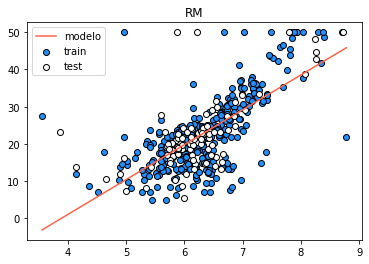

In [ ]:
# 4. Graficar acá. Ayuda:
x_start = min(np.min(X_train_f), np.min(X_test_f))
x_end = max(np.max(X_train_f), np.max(X_test_f))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)
plt.plot(x, model.predict(x), color="tomato", label="modelo")

plt.scatter(X_train_f, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_f, y_test, facecolor="white", edgecolor="k", label="test")
plt.title(feature)
plt.legend()
plt.show()

**Respuesta** 5

Cuando seleccionamos la variable RM como la principal variable explicativa del modelo, observamos un comportamiento lineal positivo. Por cada aumento unitario en la cantidad de habitaciones se observa en premedio un aumento de 9.37 en miles de dólares en el precio mediano de las viviendas.

Calculamos el error cuadrático medio, donde obtuvimos un resultado menor en set de evaluación que en el de entrenamiento, lo cual es esperable.

## Ejercicio 4: Regresión Polinomial

En este ejercicio deben entrenar regresiones polinomiales de diferente complejidad, siempre usando **scikit-learn**.

Deben usar **el mismo atributo** seleccionado para el ejercicio anterior.

1. Para varios grados de polinomio, haga lo siguiente:
    1. Instancie y entrene una regresión polinomial.
    2. Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
    3. Guarde los errores en una lista.
2. Grafique las curvas de error en términos del grado del polinomio.
3. Interprete la curva, identificando el punto en que comienza a haber sobreajuste, si lo hay.
4. Seleccione el modelo que mejor funcione, y grafique el modelo conjuntamente con los puntos.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se pueden obtener errores en test menores a 40 e incluso a 35.

In [ ]:
# 1. Resolver acá.
train_errors = []
test_errors = []
degrees = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
for degree in degrees:
    # train:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train_f, y_train)
    
    # predict:
    y_train_pred = model.predict(X_train_f)
    y_test_pred = model.predict(X_test_f)
    
    # evaluate:
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)

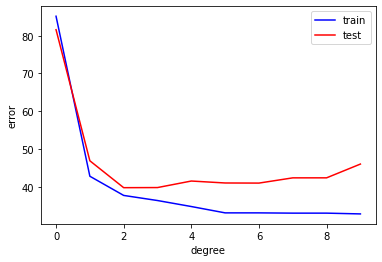

In [ ]:
# 2. Graficar curvas de error acá.
plt.plot(degrees, train_errors, color="blue", label="train")
plt.plot(degrees, test_errors, color="red", label="test")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

**Respuesta** 3

En la gráfica se observa que a partir del grado dos, donde el error cuadrático medio encuetra los valores mas bajos para el set test, la curva empieza a sobreajustar, indicando que modelos con polinomio de grado mayor presenta menor poder explicativo en el set de evaluación, dando lugar al fenómeno conocido como 'overfitting'.

Train error: 37.74552897028126
Test error: 39.79473116372652


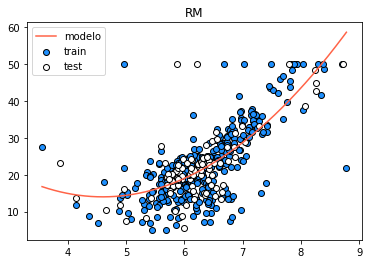

In [ ]:
# 4. Reconstruir mejor modelo acá y graficar.
degree = 2
model2 = make_pipeline(PolynomialFeatures(degree), LinearRegression())

model2.fit(X_train_f, y_train)

#predecir
y_train_pred= model2.predict(X_train_f)
y_test_pred= model2.predict(X_test_f)

train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)
print(f'Train error: {train_error}')
print(f'Test error: {test_error}')


plt.plot(x, model2.predict(x), color="tomato", label="modelo")
plt.scatter(X_train_f, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_f, y_test, facecolor="white", edgecolor="k", label="test")
plt.title(feature)
plt.legend()
plt.show()


**Respuesta** 5
La regresión polinomial de grado dos es la que presenta un mejor ajuste dado que minimiza el error cuadrático medio (ECM) para el set de evaluación. Se observa que si aumentamos de grado el polinomio, la variación en el ECM para el set de entrenamiento disminuye considerablemente, ya que el modelo sobreajusta a los puntos utilizados en el entrenamiento. Esto a su vez hace aumentar el ECM para el set de evaluacion. En este caso, ese aumento no es muy marcado e incluyo para grados muy altos (no mostrado) incluso presentó una leve baja respecto al EMC usando un grado 2.
Si se compara con la regresión lineal realizada en el punto anterior, vemos que esta la regresión polinomial de grado 2 ajusta mejor, y podría desempeñarse mejor como herramienta predictiva.


## Ejercicio 5: Regresión con más de un Atributo

En este ejercicio deben entrenar regresiones que toman más de un atributo de entrada.

1. Seleccione **dos o tres atributos** entre los más relevantes encontrados en el ejercicio 2.
2. Repita el ejercicio anterior, pero usando los atributos seleccionados. No hace falta graficar el modelo final.
3. Interprete el resultado y compare con los ejercicios anteriores. ¿Se obtuvieron mejores modelos? ¿Porqué?

In [ ]:
# 1. Resolver acá. Ayuda (con dos atributos):
selector = (boston['feature_names'] == 'RM') | (boston['feature_names'] == 'LSTAT')
X_train_fs = X_train[:, selector]
X_test_fs = X_test[:, selector]
X_train_fs.shape, X_test_fs.shape

((404, 2), (102, 2))

In [ ]:
# 2. Resolver acá.

degree=2
model3 = make_pipeline(PolynomialFeatures(degree), LinearRegression())

model3.fit(X_train_fs, y_train)

#predecir
y_train_pred= model3.predict(X_train_fs)
y_test_pred= model3.predict(X_test_fs)

train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)
print(f'Train error: {train_error}')
print(f'Test error: {test_error}')


Train error: 18.659453833139377
Test error: 28.14497186312392


**Respuesta** 3

Se observa que al agregar una variable, el modelo ajusta mejor y el error cuadrático medio disminuye considerablemente. Esto es consecuenciade de que ambas variables son las que mayor correlación tienen con la varibale objetivo y al incluir una segunda variable se incorpora información que permite explicar mejor la variable objetivo respecto del modelo con una sola variable. Si por ejemplo se entrenara el modelo con una variable de débil o nula correlación, el error cuadrático medio no disminuye e incluso puede aumentar.

## Ejercicio 7: A Todo Feature
Entrene y evalúe regresiones pero utilizando todos los atributos de entrada (va a andar mucho más lento). Estudie los resultados.



In [ ]:
model3.fit(X_train, y_train)

#predecir
y_train_pred= model3.predict(X_train)
y_test_pred= model3.predict(X_test)

train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)
print(f'Train error: {train_error}')
print(f'Test error: {test_error}')


Train error: 6.310156128322766
Test error: 25.215797416856976


Cuando entrenamos con todas las variables, el ECM para el set de evaluación no exhibe una disminución relevante, dado que entre todas las variables agregadas quizás algunas aportan algun grado de explicación, pero muchas introducen a su vez ruido dado que no presentan correlacioanes significativas con la variable objetivo.

## Ejercicio 8: Regularización
Entrene y evalúe regresiones con regularización "ridge". Deberá probar distintos valores de "alpha" (fuerza de la regularización). ¿Mejoran los resultados?

In [ ]:
from sklearn.linear_model import Ridge

alpha=80

model4 = make_pipeline(PolynomialFeatures(degree), Ridge(alpha))

model4.fit(X_train, y_train)

#predecir
y_train_pred= model4.predict(X_train)
y_test_pred= model4.predict(X_test)

train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)
print(f'Train error: {train_error}')
print(f'Test error: {test_error}')

Train error: 5.975176839423302
Test error: 22.52061353434587


A mayor parámetro de penalizacion, se observa que el ecm disminuye. ##justificar##